In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Wanted/London_bicycle.csv', parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


MetaData:
- "timestamp" - 데이터 그룹화를 위한 타임스탬프 필드
- "cnt" - 새 자전거 공유 횟수
- "t1" - 실제 온도(C)
- "t2" - 온도(C) "느낌"
- "윙윙" - 습도(%)
- "wind_speed" - 풍속(km/h)
- "weather_code" - 날씨 카테고리
- "is_holiday" - 부울 필드 - 1 휴일 / 0 비휴일
- "is_weekend" - 부울 필드 - 하루가 주말인 경우 1
- "계절" - 카테고리 필드 기상 계절: 0-봄; 1-여름; 2-가을; 3-겨울.

- "weathe_code" 카테고리 설명:
1 = 지우기 ; 대부분 맑으나 약간의 값이 있음/연무/안개/안개/안개가 주변에 있음 2 = 흩어진 구름/구름 거의 없음 3 = 흩어진 구름 4 = 흐림 7 = 비/약한 소나기/약한 비 10 = 천둥번개를 동반한 비 26 = 눈 94 = 얼어붙는 안개

In [4]:
# 데이터 타입과 구조
print('데이터의 구조는', df.shape)
print('데이터의 타입은', df.dtypes)
print('데이터의 칼럼은', df.columns)

데이터의 구조는 (17414, 10)
데이터의 타입은 timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 칼럼은 Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [5]:
# 결측치
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

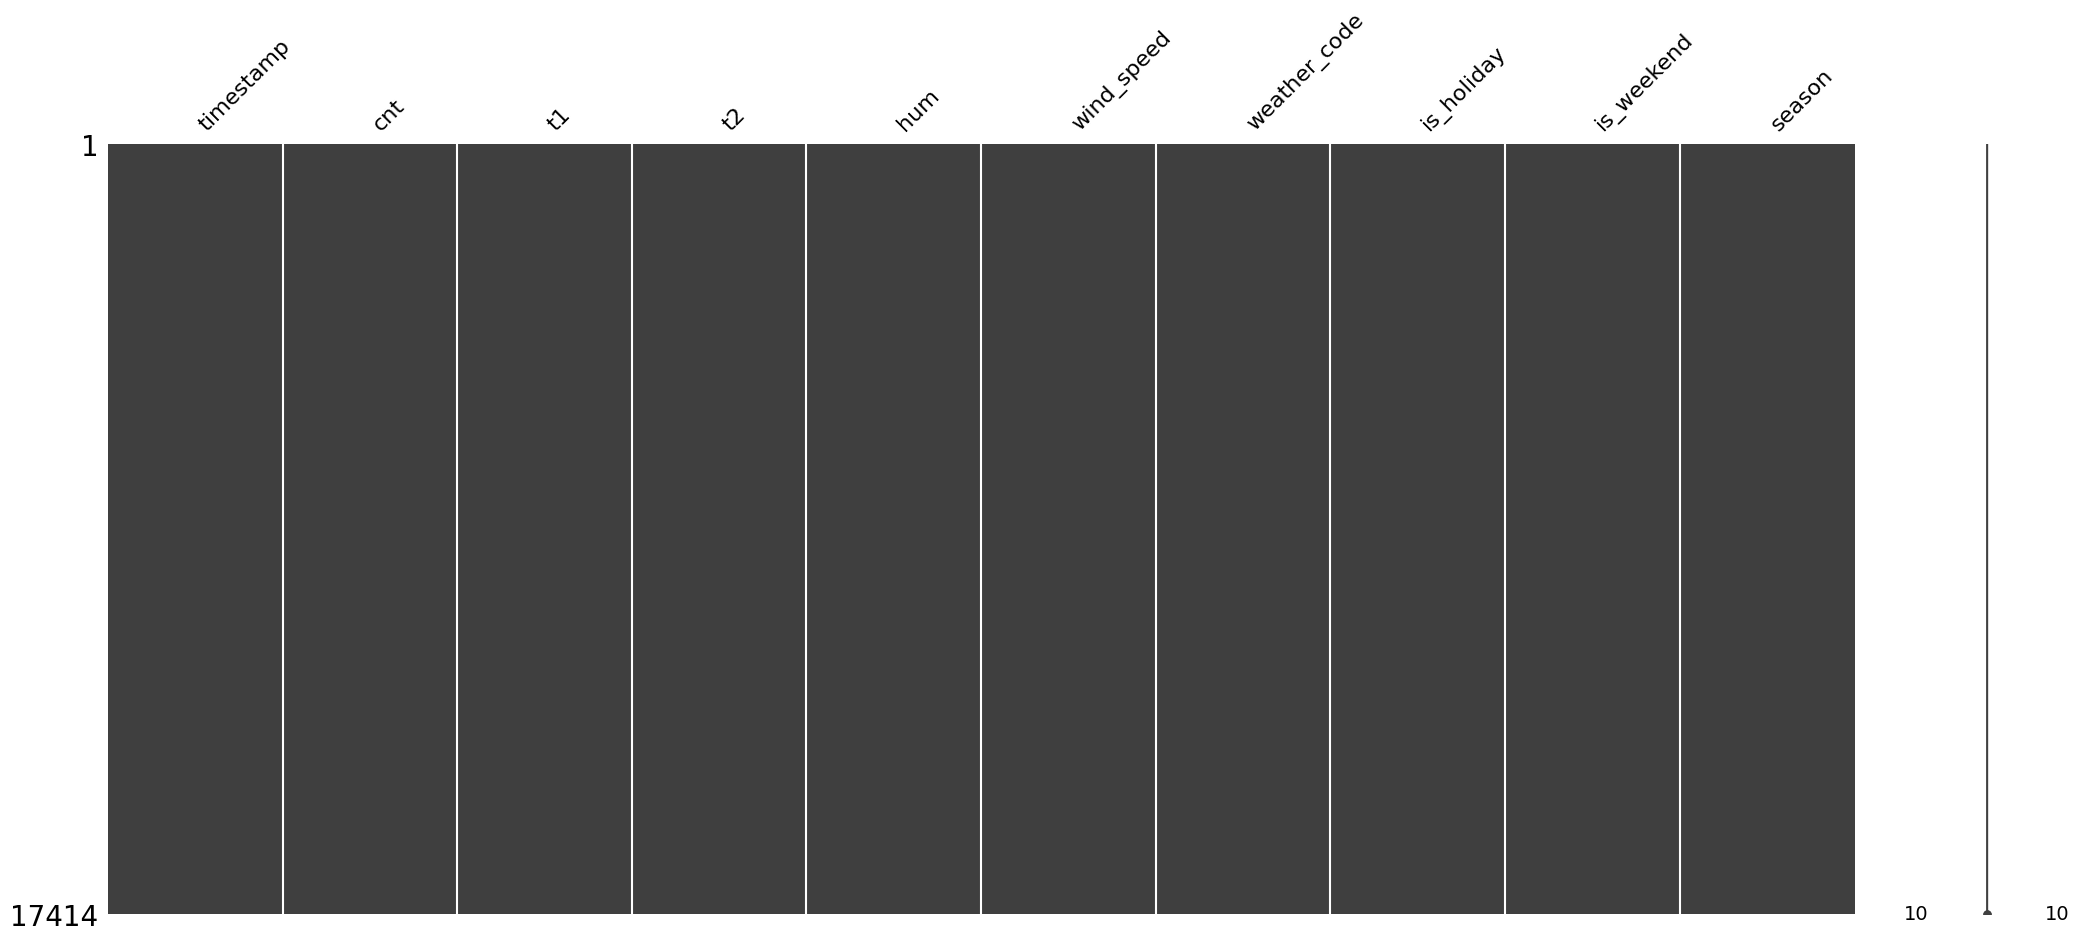

In [6]:
# 결측치 시각화
msno.matrix(df);

In [7]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday

In [8]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour,weekday
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,0,6
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,1,6
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,2,6
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,3,6
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6


In [9]:
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

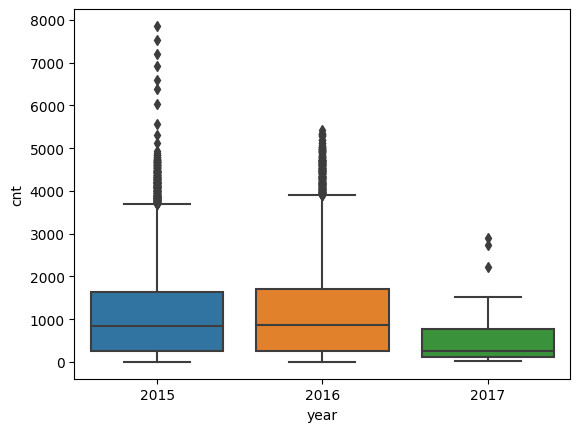

In [10]:
sns.boxplot(x = df['year'], y = df['cnt']);

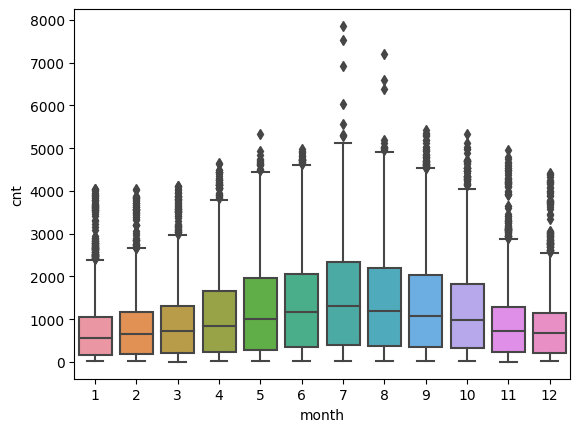

In [11]:
sns.boxplot(x = df['month'], y = df['cnt']);

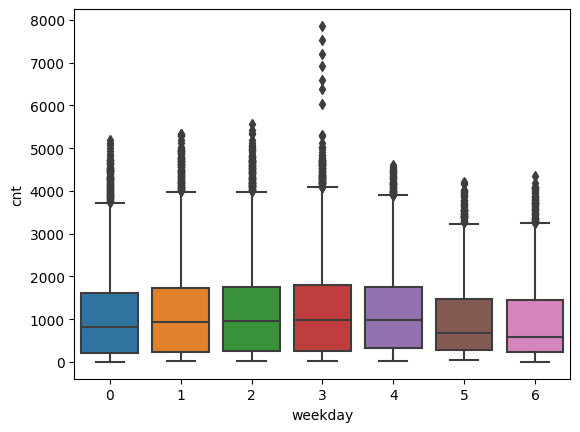

In [12]:
sns.boxplot(x = df['weekday'], y = df['cnt']);

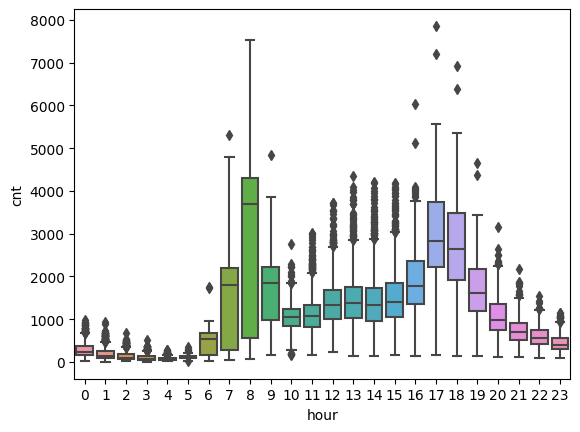

In [13]:
sns.boxplot(x = df['hour'], y = df['cnt']);

In [14]:
# 그래프 함수 만들기
def plot_bar(data, feature):
  fig = plt.figure(figsize = (12,3))
  sns.barplot(x = data[feature], y = data['cnt'])

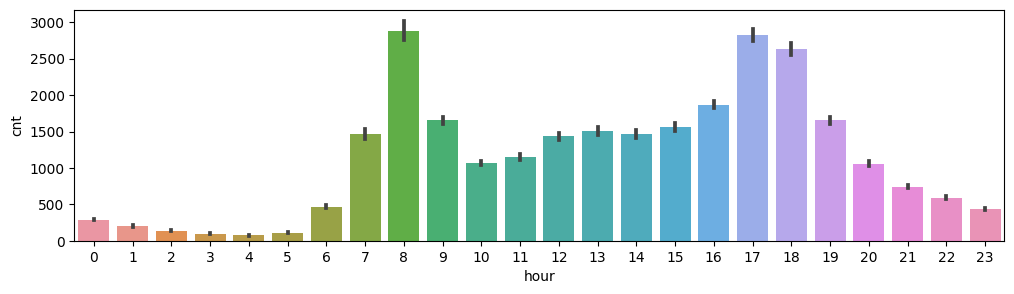

In [15]:
plot_bar(df, 'hour')

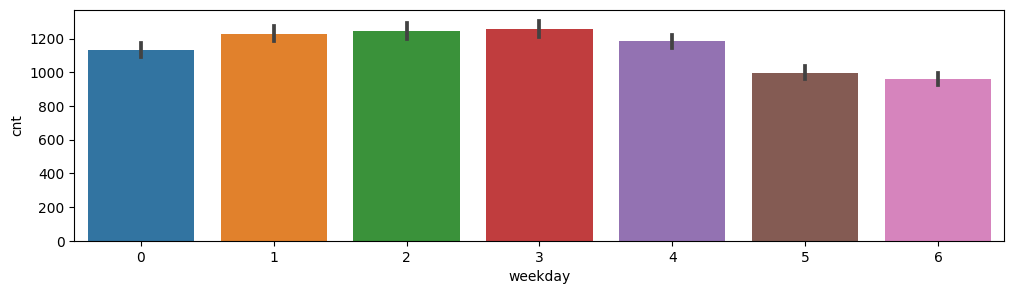

In [16]:
plot_bar(df, 'weekday')

In [17]:
# 이상치 제거
def remove_outliers(s):
  lower_limit = s.mean() - (s.std()*3)
  upper_limit = s.mean() + (s.std()*3)
  return ~s.between(lower_limit, upper_limit)

In [18]:
df_out = df[~df.groupby('hour')['cnt'].apply(remove_outliers)]
print('이상치 제거 전', df.shape)
print('이상치 제거 후', df_out.shape)

이상치 제거 전 (17414, 14)
이상치 제거 후 (17265, 14)


In [19]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
hour                     int64
weekday                  int64
dtype: object

In [20]:
# 범주형 변수
df_out['weather_code'] = df_out['weather_code'].astype('category')
df_out['season'] = df_out['season'].astype('category')
df_out['year'] = df_out['year'].astype('category')
df_out['month'] = df_out['month'].astype('category')
df_out['hour'] = df_out['hour'].astype('category')

In [21]:
# 더미 변수
df_out = pd.get_dummies(df_out, columns = ['weather_code', 'season', 'year', 'month','hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,weekday,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_out.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'is_holiday',
       'is_weekend', 'weekday', 'weather_code_1.0', 'weather_code_2.0',
       'weather_code_3.0', 'weather_code_4.0', 'weather_code_7.0',
       'weather_code_10.0', 'weather_code_26.0', 'season_0.0', 'season_1.0',
       'season_2.0', 'season_3.0', 'year_2015', 'year_2016', 'year_2017',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [23]:
df_out.shape

(17265, 59)

In [24]:
# 데이터 셋 분리
from sklearn.model_selection import train_test_split
X = df_out.drop(['timestamp','cnt'], axis = 1)
y = df_out['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)

In [25]:
print('x_train : ', X_train.shape)
print('x_test : ', X_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

x_train :  (13812, 57)
x_test :  (3453, 57)
y_train :  (13812,)
y_test :  (3453,)


In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [27]:
model = Sequential()
model.add(Dense(160, activation = 'relu', input_dim = 57))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               9280      
                                                                 
 dense_1 (Dense)             (None, 60)                9660      
                                                                 
 dense_2 (Dense)             (None, 20)                1220      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 20181 (78.83 KB)
Trainable params: 20181 (78.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss = 'mae', optimizer = 'adam', metrics = ['mae'])
early_stopping = EarlyStopping(monitor = 'loss', patience = 5, mode = 'min')
history = model.fit(X_train, y_train, epochs = 50, batch_size = 1, validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/50
12430/12430 [==============================] - 30s 2ms/step - loss: 491.4883 - mae: 491.4883 - val_loss: 386.5351 - val_mae: 386.5351
Epoch 2/50
12430/12430 [==============================] - 28s 2ms/step - loss: 276.6042 - mae: 276.6042 - val_loss: 249.3673 - val_mae: 249.3673
Epoch 3/50
12430/12430 [==============================] - 27s 2ms/step - loss: 223.2991 - mae: 223.2991 - val_loss: 273.0311 - val_mae: 273.0311
Epoch 4/50
12430/12430 [==============================] - 29s 2ms/step - loss: 196.0807 - mae: 196.0807 - val_loss: 194.9455 - val_mae: 194.9455
Epoch 5/50
12430/12430 [==============================] - 29s 2ms/step - loss: 172.6179 - mae: 172.6179 - val_loss: 176.5199 - val_mae: 176.5199
Epoch 6/50
12430/12430 [==============================] - 28s 2ms/step - loss: 163.1838 - mae: 163.1838 - val_loss: 191.4980 - val_mae: 191.4980
Epoch 7/50
12430/12430 [==============================] - 26s 2ms/step - loss: 158.4154 - mae: 158.4154 - val_loss: 202.2763 - val

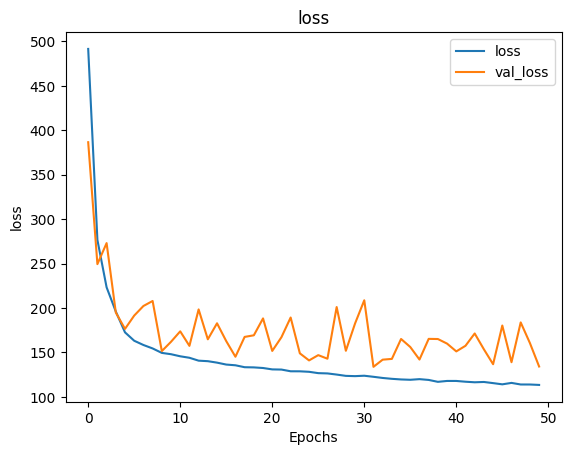

In [30]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss']);

In [31]:
y_predict = model.predict(X_test)

108/108 [==============================] - 0s 2ms/step


In [32]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict):
  return round(np.sqrt(mean_squared_error(y_test, y_predict)),2)

In [33]:
print('RMSE', RMSE(y_test, y_predict))

RMSE 254.5


In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=16)
rf.fit(X_train, y_train)
rf_result = rf.predict(X_test)
print('RMSE', RMSE(y_test, rf_result))

RMSE 302.29


In [35]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state = 16)
xgb.fit(X_train, y_train)
xgb_result = xgb.predict(X_test)
print('RMSE', RMSE(y_test, xgb_result))

RMSE 300.17


In [36]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=100, random_state = 16)
lgbm.fit(X_train, y_train)
lgbm_result = lgbm.predict(X_test)
print('RMSE', RMSE(y_test, lgbm_result))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 13812, number of used features: 55
[LightGBM] [Info] Start training from score 1122.551260
RMSE 319.68


In [37]:
xgb = pd.DataFrame(xgb_result)
rf = pd.DataFrame(rf_result)
lgbm = pd.DataFrame(lgbm_result)
dnn = pd.DataFrame(y_predict)
compare = pd.DataFrame(y_test).reset_index(drop = True)

In [38]:
compare['xgb'] = xgb
compare['rf'] = rf
compare['lgbm'] = lgbm
compare['dnn'] = dnn
compare.head()

,cnt,xgb,rf,lgbm,dnn
0,2997,2702.986816,2728.20,2705.394820,2763.388428
1,1877,1671.580444,1673.27,1687.454041,1765.326782
2,1178,1222.411743,1221.85,1129.711214,1285.087158
3,922,935.574280,943.45,857.990253,991.592163
4,578,547.403992,687.04,702.130381,733.695862


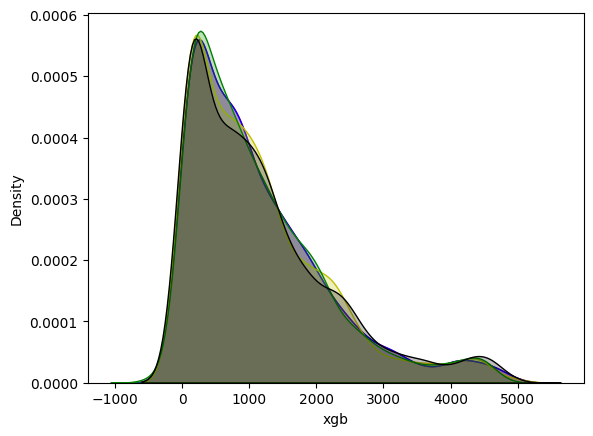

In [39]:
sns.kdeplot(compare['xgb'], label = 'xgb', color = 'r',shade = True)
sns.kdeplot(compare['xgb'], label = 'xgb', color = 'b',shade = True)
sns.kdeplot(compare['rf'], label = 'rf', color = 'y',shade = True)
sns.kdeplot(compare['lgbm'], label = 'lgbm', color = 'g',shade = True)
sns.kdeplot(compare['dnn'], label = 'dnn', color = 'k',shade = True)
plt.show()

In [40]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour,weekday
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,0,6
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,1,6
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,2,6
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,3,6
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6


In [41]:
train = df.iloc[:17000, 1:2]
test = df.iloc[17000:, 1:2]

In [ ]:
test = np.array(test)

In [42]:
print(train.shape)
print(test.shape)

(17000, 1)
(414, 1)


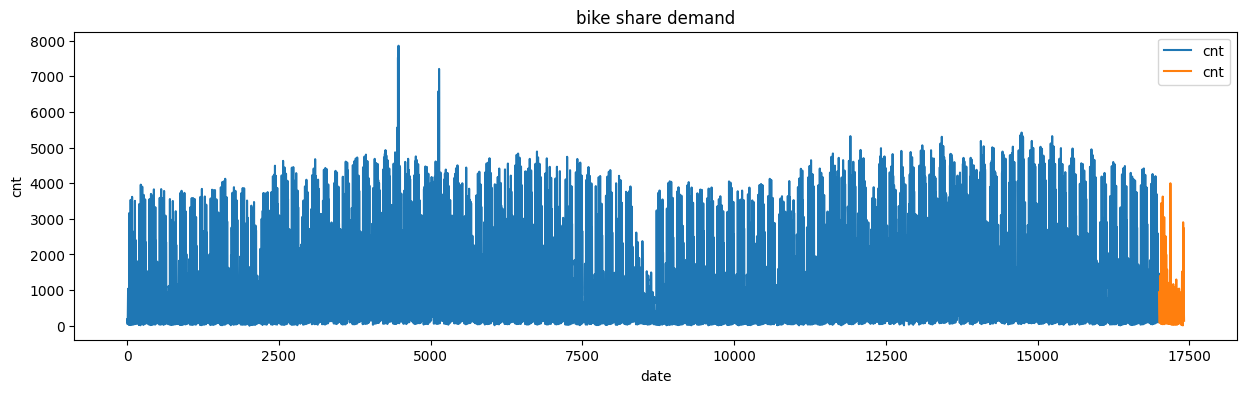

In [43]:
plt.title('bike share demand')
plt.xlabel('date')
plt.ylabel('cnt')
df['cnt'][:17000].plot(figsize = (15, 4), legend=True)
df['cnt'][17000:].plot(figsize = (15, 4), legend=True);

In [44]:
from statsmodels.tsa.stattools import pacf
pacf = pacf(df['cnt'], nlags = 20, method = 'ols')
print(pacf)

[ 1.          0.78148357 -0.41172684  0.18486682 -0.07510114 -0.09947694
 -0.08494917 -0.00403993  0.0920456   0.07065422 -0.32935188 -0.06873344
  0.05112775  0.04852911  0.06695059 -0.19621297 -0.07610221  0.14365297
 -0.11638129  0.18990804  0.16480713]


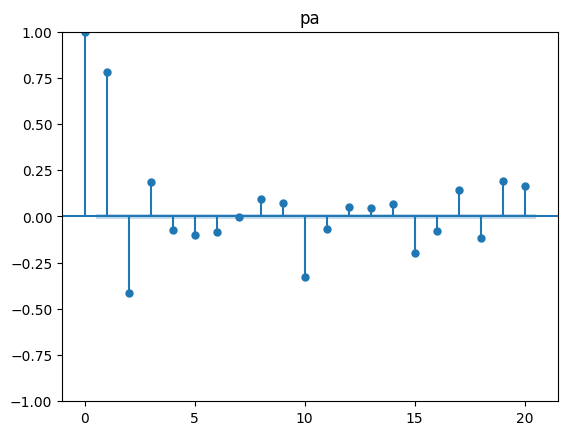

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['cnt'], lags = 20, method='ols', title = 'pa').show()

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

In [47]:
X_train = []
y_train = []
for i in range(1, 17000):
  X_train.append(train_scaled[i-1:i, 0])
  y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [48]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(16999, 1, 1)

## RNN

In [49]:
from keras.layers import Activation
from keras.layers import SimpleRNN

In [93]:
rnn = Sequential()
rnn.add(SimpleRNN(6, activation = 'relu', input_shape = (1, 1)))
rnn.add(Dense(1,activation = 'linear'))

In [94]:
rnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 6)                 48        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 55 (220.00 Byte)
Trainable params: 55 (220.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
rnn.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [96]:
rnn.fit(X_train, y_train, epochs = 5, batch_size = 1)

Epoch 1/5
16999/16999 [==============================] - 41s 2ms/step - loss: 0.0077 - mse: 0.0077
Epoch 2/5
16999/16999 [==============================] - 38s 2ms/step - loss: 0.0077 - mse: 0.0077
Epoch 3/5
16999/16999 [==============================] - 42s 2ms/step - loss: 0.0077 - mse: 0.0077
Epoch 4/5
16999/16999 [==============================] - 35s 2ms/step - loss: 0.0077 - mse: 0.0077
Epoch 5/5
16999/16999 [==============================] - 35s 2ms/step - loss: 0.0077 - mse: 0.0077


In [57]:
X_test = []
for i in range(1,415):
  X_test.append(test_scaled[i-1:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [60]:
X_test.shape

(414, 1, 1)

In [97]:
rnn = rnn.predict(X_test)
rnn = scaler.inverse_transform(rnn)

13/13 [==============================] - 0s 2ms/step


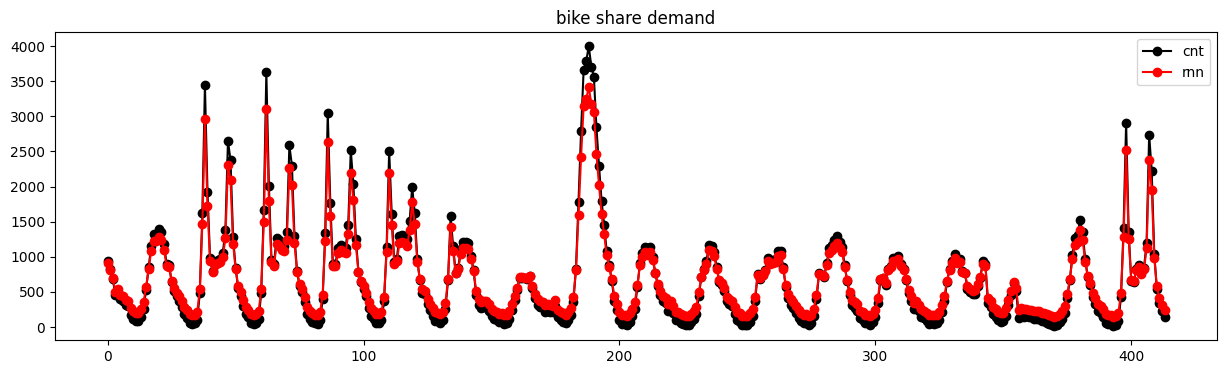

In [98]:
plt.figure(figsize = (15, 4))
plt.title('bike share demand')
plt.plot(test, marker = 'o', label = 'cnt', color = 'black')
plt.plot(rnn, marker = 'o', label = 'rnn', color = 'red')
plt.legend();

## RSTM

In [106]:
from keras.layers import LSTM
lstm = Sequential()
lstm.add(LSTM(6, activation = 'relu', input_shape = (1,1)))
lstm.add(Dense(1, activation = 'linear'))

In [107]:
lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6)                 192       
                                                                 
 dense_10 (Dense)            (None, 1)                 7         
                                                                 
Total params: 199 (796.00 Byte)
Trainable params: 199 (796.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
lstm.compile(loss = 'mse', optimizer= 'adam', metrics = ['mse'])
lstm.fit(X_train, y_train, epochs = 5, batch_size = 1)

Epoch 1/5
16999/16999 [==============================] - 43s 2ms/step - loss: 0.0085 - mse: 0.0085
Epoch 2/5
16999/16999 [==============================] - 39s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 3/5
16999/16999 [==============================] - 41s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 4/5
16999/16999 [==============================] - 38s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 5/5
16999/16999 [==============================] - 40s 2ms/step - loss: 0.0068 - mse: 0.0068


In [110]:
lstm = lstm.predict(X_test)
lstm = scaler.inverse_transform(lstm)

13/13 [==============================] - 0s 2ms/step


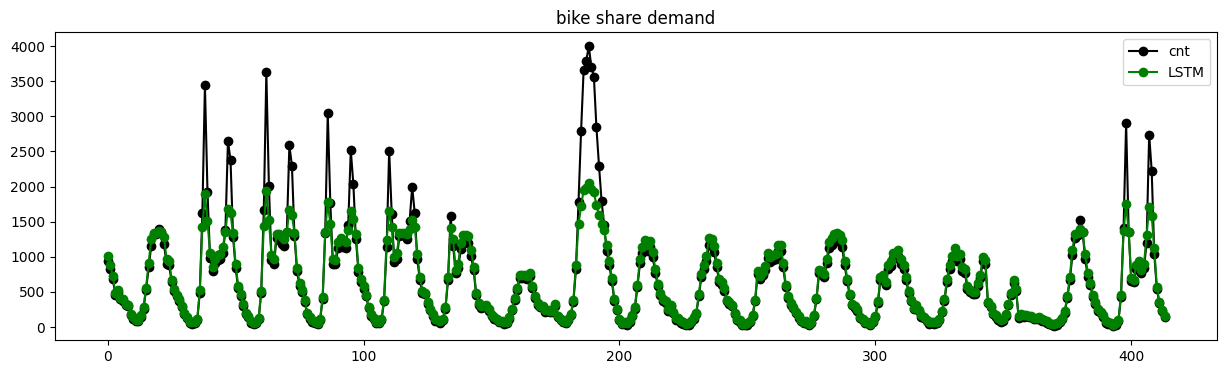

In [111]:
plt.figure(figsize = (15, 4))
plt.title('bike share demand')
plt.plot(test, marker = 'o', label = 'cnt', color = 'black')
plt.plot(lstm, marker = 'o', label = 'LSTM', color = 'green')
plt.legend();

## GRU

In [112]:
from keras.layers import GRU
gru = Sequential()
gru.add(GRU(units=6, activation = 'relu', input_shape=(1,1)))
gru.add(Dense(1, activation = 'linear'))

In [113]:
gru.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 6)                 162       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
gru.compile(loss = 'mse', optimizer= 'adam', metrics = 'mse')
gru.fit(X_train, y_train, epochs = 5, batch_size = 1)

Epoch 1/5
16999/16999 [==============================] - 39s 2ms/step - loss: 0.0079 - mse: 0.0079
Epoch 2/5
16999/16999 [==============================] - 39s 2ms/step - loss: 0.0069 - mse: 0.0069
Epoch 3/5
16999/16999 [==============================] - 37s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 4/5
16999/16999 [==============================] - 40s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 5/5
16999/16999 [==============================] - 37s 2ms/step - loss: 0.0068 - mse: 0.0068


In [115]:
gru = gru.predict(X_test)
gru = scaler.inverse_transform(gru)

13/13 [==============================] - 0s 2ms/step


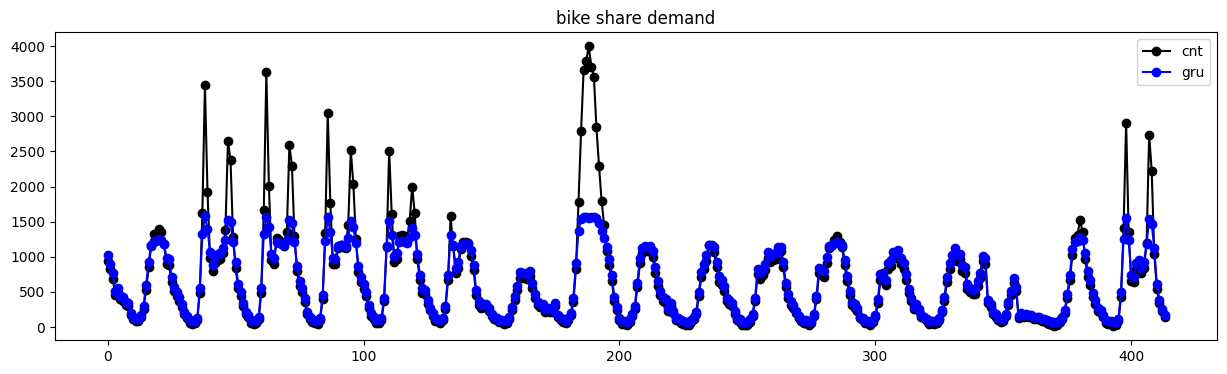

In [116]:
plt.figure(figsize = (15, 4))
plt.title('bike share demand')
plt.plot(test, marker = 'o', label = 'cnt', color = 'black')
plt.plot(gru, marker = 'o', label = 'gru', color = 'blue')
plt.legend();

## 비교


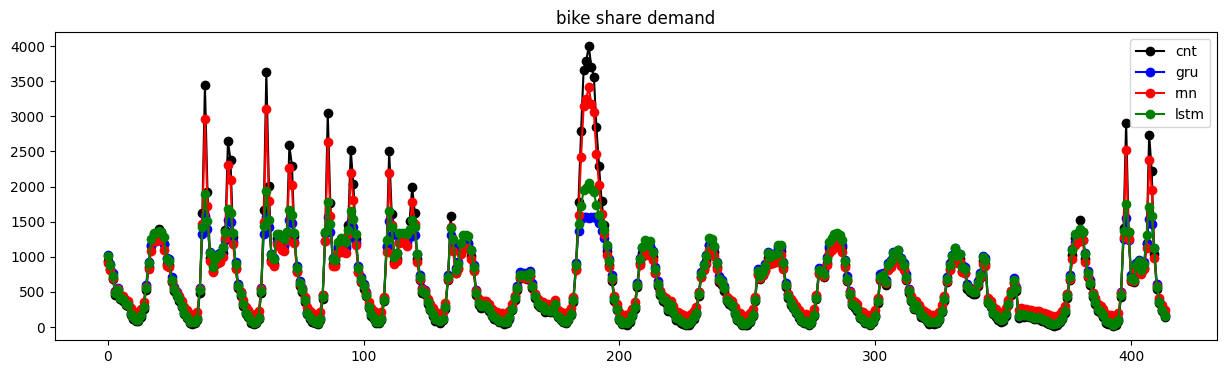

In [117]:
plt.figure(figsize = (15, 4))
plt.title('bike share demand')
plt.plot(test, marker = 'o', label = 'cnt', color = 'black')
plt.plot(gru, marker = 'o', label = 'gru', color = 'blue')
plt.plot(rnn, marker = 'o', label = 'rnn', color = 'red')
plt.plot(lstm, marker = 'o', label = 'lstm', color = 'green')
plt.legend();

In [118]:
print('RNN RMSE : ', RMSE(test, rnn))
print('LSTM RMSE : ', RMSE(test, lstm))
print('GRU RMSE : ', RMSE(test, gru))

RNN RMSE :  125.84
LSTM RMSE :  289.94
GRU RMSE :  351.98
